# Analysis

#### Importing the cleaned data set and required packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scripts import project_functions

sns.set_theme(style="ticks",font_scale=1.3)

In [3]:
df = project_functions.load_and_process('../data/raw/winemag-data.csv')
df.head()

,Country,Points,Price,Province,Region,Name,Variety,Winery
0,US,87,14.0,Oregon,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
1,US,87,13.0,Michigan,Lake Michigan Shore,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
2,US,87,65.0,Oregon,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
3,France,87,24.0,Alsace,Alsace,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
4,France,87,27.0,Alsace,Alsace,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam


## Question 1: How is the price of wine related to points scored? 

#### First, I will look at a scatterplot to compare price and points:

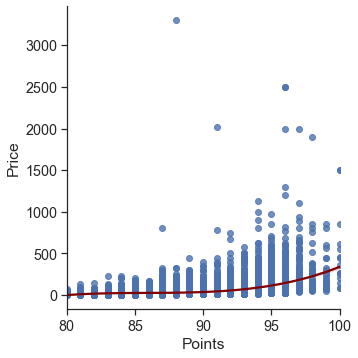

In [4]:
sns.lmplot(
    data=df,
    x="Points", y="Price",
    height=5,
    order = 3,
    palette = 'rocket_r',
    line_kws={"color":"maroon"}
)

#### Now, lets look at a scatter plot for each country:

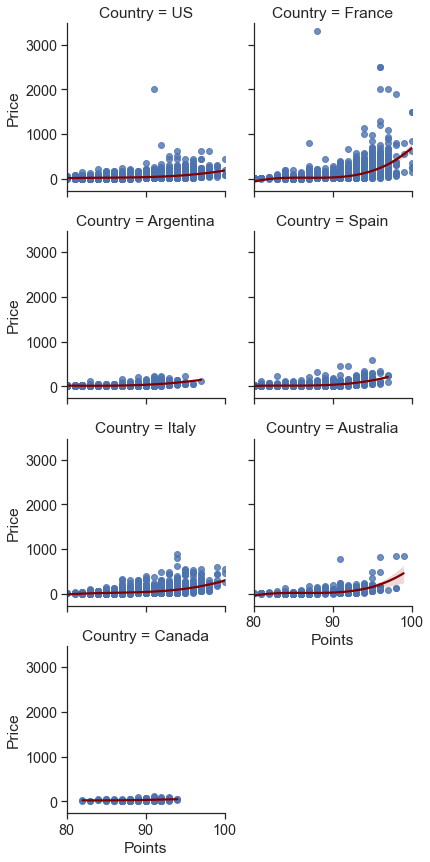

In [202]:
sns.lmplot(x="Points", y="Price", col="Country", data=df,
           col_wrap=2, height=3,line_kws={"color":"maroon"}, order = 3);

### Conclusion:
As Price increases, so does Points. However, this relationship is very weak. As Points increases, the Price only slightly increases. Therefore, it is not neccessarily true that all high quality wines are more expensive. Some countries, such as France, Italy, and Austrailia have a higher correlation.

## Question 2: What country produces the best quality wine?

#### First, we need to take a look at the countries that have the highest average score for wine.

Text(0.5, 1.0, 'Average Score of Wine by Country')

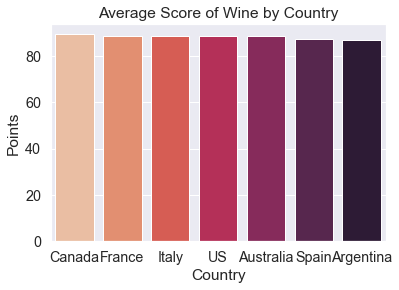

In [205]:
points_by_country = pd.DataFrame(df.groupby('Country').mean()['Points'])
points_by_country = points_by_country.sort_values(by = 'Points', ascending = False)[:10].reset_index()

sns.set_theme(font_scale=1.3)
sns.barplot(data = points_by_country, x = 'Country',y='Points',palette='rocket_r').set_title("Average Score of Wine by Country")

#### Now we will look at which country has the most perfect scoring wines.

Text(0.5, 1.0, 'Perfect Score Wine by Country (Score = 100)')

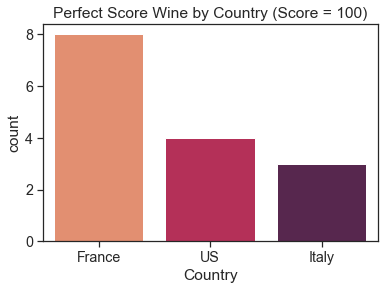

In [47]:
PS = df[ df['Points'].max() == df['Points'] ]
# These are wines that get a maximum score of 100

sns.countplot(data=PS, 
              x='Country',
              order= PS['Country'].value_counts().index[:6],palette='rocket_r'
             ).set_title("Perfect Score Wine by Country (Score = 100)")

#### Lets look at the overall distributions of the Points data by Country:

Text(0.5, 1.0, 'Points by Country')

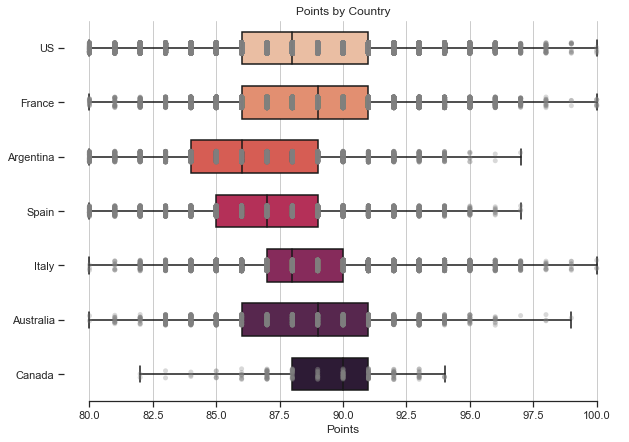

In [192]:
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(10, 7))

sns.boxplot(x="Points", y="Country", data=df,
            whis=[0, 100], width=.6, palette="rocket_r")

sns.stripplot(x="Points", y="Country", data=df,
              size=5, color=".5", linewidth=0,alpha=.3, jitter = 1, dodge= True)

ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)
ax.set_title("Points by Country")

### Conclusion: 
Although all countries have very similar averages of points, it is clear that France overall has the best scoring wine. Although Canada has the highest average, it look as if this could be because of lack of data. France has the most perfect scoring wines and has the highest scoring wines out of the top ten varieties.

## Question 3: What are the top ten most expensive provinces for producing wine?

#### Sort the data set and look at the top 10 regions:

[Text(0, 0, 'Champagne'),
 Text(0, 0, 'Burgundy'),
 Text(0, 0, 'Piedmont'),
 Text(0, 0, 'Tuscany'),
 Text(0, 0, 'Nevada'),
 Text(0, 0, 'Bordeaux'),
 Text(0, 0, 'Rhône Valley'),
 Text(0, 0, 'California'),
 Text(0, 0, 'South Australia'),
 Text(0, 0, 'Victoria')]

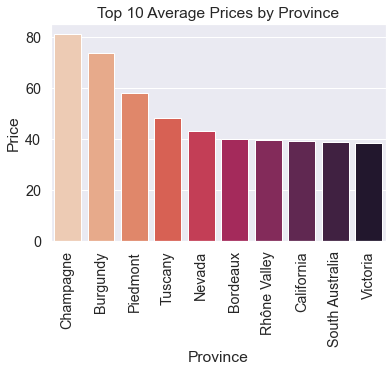

In [362]:
price_by_region = pd.DataFrame(df.groupby('Province').mean()['Price'])
price_by_region = price_by_region.sort_values(by = 'Price', ascending = False)[:10].reset_index()

sns.set_theme(font_scale=1.3)
plt = sns.barplot(data = price_by_region, 
            x = 'Province', 
            y = 'Price',
            palette = 'rocket_r')
plt.set_title("Top 10 Average Prices by Province")
x = plt.get_xticklabels()
plt.set_xticklabels(x, rotation=90)

#### Which regions produce the top 10 most expensive wines?

[Text(0, 0, 'Bordeaux'), Text(0, 0, 'Burgundy'), Text(0, 0, 'California')]

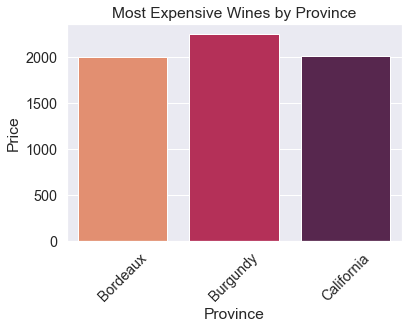

In [366]:
wine_by_price = df[['Price','Name','Province']].sort_values(by = 'Price', ascending = False)[:10]
plt = sns.barplot(data = wine_by_price, 
            x = 'Province', 
            y = 'Price',
            ci = None,
            palette = 'rocket_r')
plt.set_title("Most Expensive Wines by Province")
x = plt.get_xticklabels()
plt.set_xticklabels(x, rotation=45)

## Conclusion:
The top ten expensive regions are most probably the ones with the highest average cost for their wines.  Although some regions have high individual wines, it is clear that the regions from the first chart are the most expensive when taking into account all wines in the region. However, if one is looking for a region containing singular highly priced wines, the ten regions in the second chart are more relevant. Overall, we can see that Champagne has the highest average cost. However, Bordeux, Burgundy, and California sell the top ten most expensive wines.

## Question 4: Which wines are the 'best deal' (high score and low price)?

#### We will look for wines that are of the highest quality. First, lets look at the distribution of points:

Text(0.5, 1.0, 'Distribution of Points')

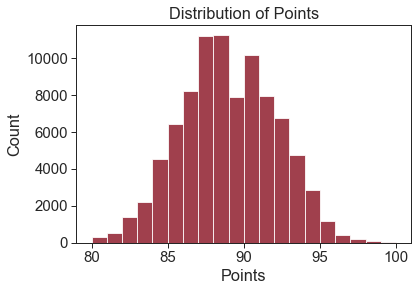

In [344]:
sns.histplot(df, x='Points',binwidth=1,stat='count',color='#800011').set_title('Distribution of Points')

#### Lets take at look the prices of high scoring wines in each country:

Text(0.5, 1.0, 'Price of Wines by Country (Score >= 95)')

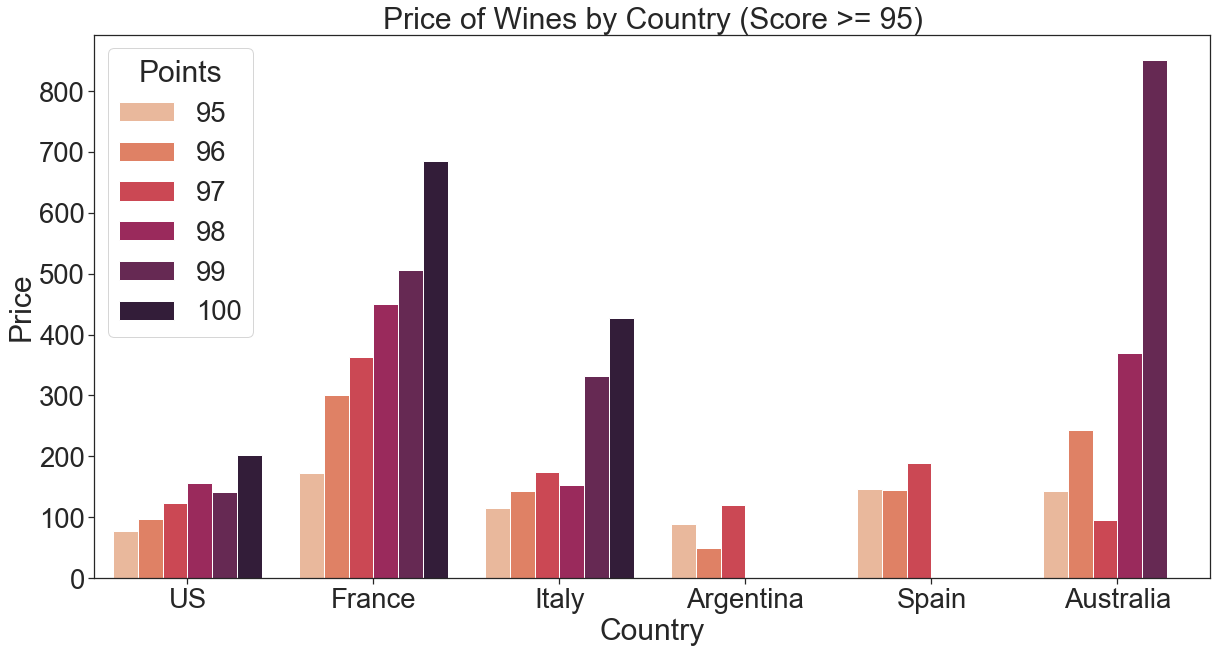

In [223]:
import matplotlib.pyplot as plt

df2 = df[['Points','Country','Price']]
df2 = df2[df2['Points']>=95]

df2 = df2.sort_values(by=['Points','Price'])

df2 = df2.reset_index(drop=True)
plt.figure(figsize=(20,10))
sns.set_theme(style="ticks",font_scale=2.5)
sns.barplot(data=df2, x='Country',y='Price',hue='Points',palette = 'rocket_r',ci=None).set_title("Price of Wines by Country (Score >= 95)")

#### Below are three heat maps that show the prices of wines in the countries with the most high quality wines: US, France, and Italy. Squares that are lower and lighter are a better deal because it is a greater quality for a lower price.

Text(0.5, 1.0, 'Price vs. Quality of 5 French Wines')

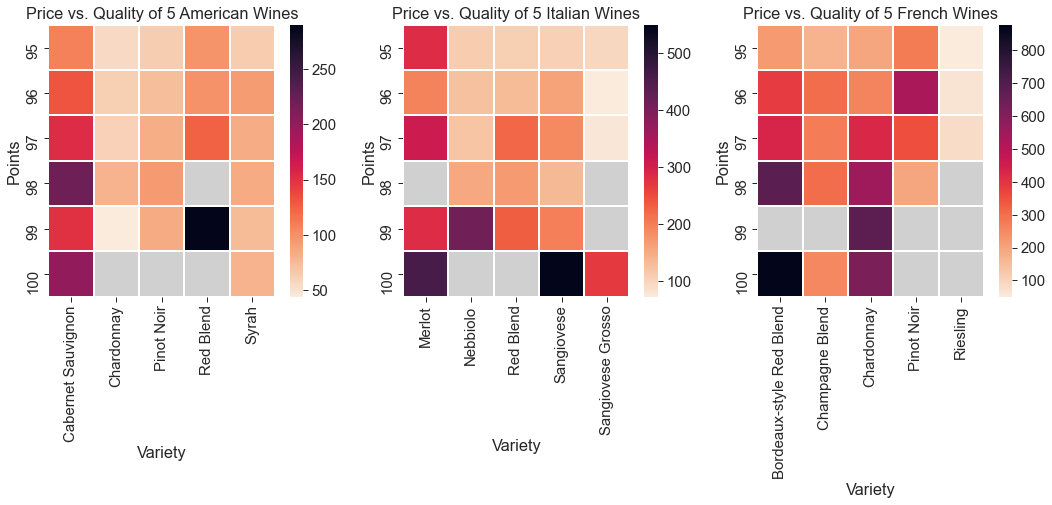

In [299]:
plt.figure(figsize=(18,5))
sns.set_context('paper', font_scale=1.7)
plt.subplot(1, 3, 1)

df2 = df[(df['Country']=='US') & (df['Points']>=95)]
df2['Variety'].value_counts()[:5]
five_wines = ['Pinot Noir','Cabernet Sauvignon','Chardonnay','Syrah','Red Blend']
df2 = df2[df2['Variety'].isin(five_wines)]
pivot = df2.pivot_table(index='Points', columns='Variety', values='Price')
g = sns.heatmap(pivot, cmap='rocket_r', linecolor='white', linewidth=1, square = True)
g.set_facecolor('#D0D0D0')
g.set_title("Price vs. Quality of 5 American Wines")

plt.subplot(1, 3, 2)
df2 = df[(df['Country']=='Italy') & (df['Points']>=95)]
df2['Variety'].value_counts()[:5]
five_wines = ['Nebbiolo','Sangiovese','Merlot','Sangiovese Grosso','Red Blend']
df2 = df2[df2['Variety'].isin(five_wines)]
pivot = df2.pivot_table(index='Points', columns='Variety', values='Price')
g = sns.heatmap(pivot, cmap='rocket_r', linecolor='white', linewidth=1, square = True)
g.set_facecolor('#D0D0D0')
g.set_title("Price vs. Quality of 5 Italian Wines")

plt.subplot(1, 3, 3)
df2 = df[(df['Country']=='France') & (df['Points']>=95)]
df2['Variety'].value_counts()[:5]
five_wines = ['Bordeaux-style Red Blend','Chardonnay','Pinot Noir','Champagne Blend','Riesling']
df2 = df2[df2['Variety'].isin(five_wines)]
pivot = df2.pivot_table(index='Points', columns='Variety', values='Price')

g = sns.heatmap(pivot, cmap='rocket_r', linecolor='white', linewidth=1, square = True)
g.set_facecolor('#D0D0D0')
g.set_title("Price vs. Quality of 5 French Wines")

#### Lets look at the top 10 wines under $15:

In [372]:
df2 = df[df['Price']<15]
df2 = df2.sort_values(by='Points',ascending=False)[:5]
df2

,Country,Points,Price,Province,Region,Name,Variety,Winery,Points-Scaled,Price-Scaled
30974,US,93,14.0,California,Russian River Valley,Novy 2006 Oley Dessert Wine Viognier (Russian ...,Viognier,Novy,3,5
37679,US,93,14.0,California,Lodi,Uvaggio 2009 Vermentino (Lodi),Vermentino,Uvaggio,3,5
65366,France,92,13.0,Southwest France,Madiran,Château d'Aydie 2012 Madiran Laplace Tannat (M...,Tannat,Château d'Aydie,3,5
5422,US,92,14.0,Washington,Yakima Valley,AntoLin Cellars 2010 Glacier Estate Vineyard R...,Riesling,AntoLin Cellars,3,5
87116,US,92,11.0,Washington,Columbia Valley (WA),Pacific Rim 2009 Riesling (Columbia Valley (WA)),Riesling,Pacific Rim,3,5


## Conclusion:

It is very difficult to quanitfy which wine is the best 'deal', because it is really based on personal preference. From my findings, the location to get the best deal on wine is certainly the US. They have the lowest average price for higher quality wines. Secondly, there are several type of wines that have a high quality and low price. In the chart above, you can see that for a price of $14, you can get a higher-than-average quality wines (93 points). In order to find a wine that is a 'good deal' based on personal preference, I made the function below.

## I made this function that will recommend you a wine to try:

In [338]:
def Recommend_me_a_wine():
    variety = input("What variety would you like? (or 'No Preference')")
    max_price = input("What is the maximum price you are willing to pay?")
    min_points = input("What is the minimum quality points you would like? (80-100)")
    
    df2 = df
    df2 = df2[df2['Points']>=int(min_points)]
    df2 = df2[df2['Price']<=int(max_price)]
    
    if variety != 'No Preference':
        df2 = df2[df2['Variety']==variety]
    
    df2['Location'] = df2['Winery']+', '+df2['Region']+', '+df2['Country']
    df2 = df2[['Name','Location']].reset_index(drop=True)
    print("")
    print("Here is a list of recommendations:")
    return df2

Recommend_me_a_wine()

What variety would you like? (or 'No Preference') No Preference
What is the maximum price you are willing to pay? 20
What is the minimum points you would like? (80-100) 95



Here is a list of recommendations:


,Name,Location
0,Dunham 2010 Lewis Estate Vineyard Riesling (Co...,"Dunham, Columbia Valley (WA), US"
1,Alain Brumont 2010 Château Bouscassé Red (Madi...,"Alain Brumont, Madiran, France"
2,Januik 2012 Bacchus Vineyard Riesling (Columbi...,"Januik, Columbia Valley (WA), US"
3,Rulo 2007 Syrah (Columbia Valley (WA)),"Rulo, Columbia Valley (WA), US"
4,Poet's Leap 2009 Riesling (Columbia Valley (WA)),"Poet's Leap, Columbia Valley (WA), US"
